In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings(action='ignore')

In [2]:
df_train=pd.read_csv("./data/train_V2.csv")
df_test =pd.read_csv("./data/test_V2.csv")

In [3]:
df_train.tail()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
4446961,afff7f652dbc10,d238e426f50de7,18492834ce5635,0,0,0.00,0,0,0,74,...,0,1292.0,0,0.000,0,0,1019.0,3,1507,0.1786
4446962,f4197cf374e6c0,408cdb5c46b2ac,ee854b837376d9,0,1,44.15,0,0,0,69,...,0,0.0,0,0.000,0,0,81.7,6,0,0.2935
4446963,e1948b1295c88a,e26ac84bdf7cef,6d0cd12784f1ab,0,0,59.06,0,0,0,66,...,0,0.0,0,2.184,0,0,788.7,4,0,0.4815
4446964,cc032cdd73b7ac,c2223f35411394,c9c701d0ad758a,0,4,180.40,1,1,2,11,...,2,0.0,0,0.000,0,0,2748.0,8,0,0.8000
4446965,0d8e7ed728b6fd,8c74f72fedf5ff,62a16aabcc095c,0,2,268.00,0,0,1,18,...,0,1369.0,0,0.000,0,0,1244.0,5,0,0.5464


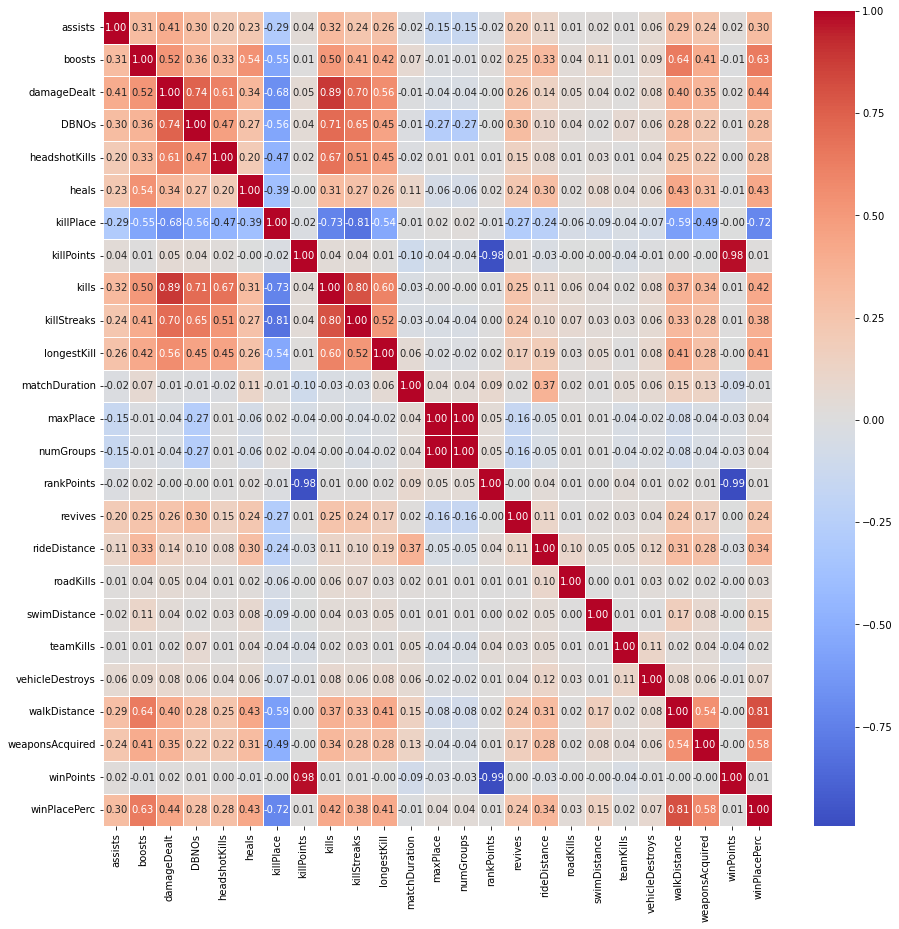

In [4]:
f,ax = plt.subplots(figsize=(15, 15))
sns.heatmap(df_train.corr(), annot=True, linewidths=1, fmt= '.2f',cmap='coolwarm')
plt.show()

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446966 entries, 0 to 4446965
Data columns (total 29 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Id               object 
 1   groupId          object 
 2   matchId          object 
 3   assists          int64  
 4   boosts           int64  
 5   damageDealt      float64
 6   DBNOs            int64  
 7   headshotKills    int64  
 8   heals            int64  
 9   killPlace        int64  
 10  killPoints       int64  
 11  kills            int64  
 12  killStreaks      int64  
 13  longestKill      float64
 14  matchDuration    int64  
 15  matchType        object 
 16  maxPlace         int64  
 17  numGroups        int64  
 18  rankPoints       int64  
 19  revives          int64  
 20  rideDistance     float64
 21  roadKills        int64  
 22  swimDistance     float64
 23  teamKills        int64  
 24  vehicleDestroys  int64  
 25  walkDistance     float64
 26  weaponsAcquired  int64  
 27  winPoints   

In [6]:
df_train['matchType'].value_counts()

squad-fpp           1756186
duo-fpp              996691
squad                626526
solo-fpp             536762
duo                  313591
solo                 181943
normal-squad-fpp      17174
crashfpp               6287
normal-duo-fpp         5489
flaretpp               2505
normal-solo-fpp        1682
flarefpp                718
normal-squad            516
crashtpp                371
normal-solo             326
normal-duo              199
Name: matchType, dtype: int64

In [7]:
train_copy = df_train.drop(['Id','groupId','matchId'], axis=1)

In [8]:
train_copy.tail()

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
4446961,0,0,0.00,0,0,0,74,1029,0,0,...,0,1292.0,0,0.000,0,0,1019.0,3,1507,0.1786
4446962,0,1,44.15,0,0,0,69,0,0,0,...,0,0.0,0,0.000,0,0,81.7,6,0,0.2935
4446963,0,0,59.06,0,0,0,66,0,0,0,...,0,0.0,0,2.184,0,0,788.7,4,0,0.4815
4446964,0,4,180.40,1,1,2,11,0,2,1,...,2,0.0,0,0.000,0,0,2748.0,8,0,0.8000
4446965,0,2,268.00,0,0,1,18,0,2,1,...,0,1369.0,0,0.000,0,0,1244.0,5,0,0.5464


In [9]:
train_copy.isna().sum()

assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       1
dtype: int64

In [10]:
train_copy['winPlacePerc'] = train_copy['winPlacePerc'].replace(np.NaN,'NaN')
train_copy.dropna(axis=0)
print(train_copy.isna().sum())

assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       0
dtype: int64


# SOLO - DBNOs, revives 제거

In [11]:
train_copy = train_copy.astype({'winPlacePerc':'float64'})

In [12]:
train_solo = train_copy[(train_copy['matchType'] == 'solo') | (train_copy['matchType'] == 'solo-fpp')]

In [13]:
train_solo = train_solo.drop(['DBNOs','revives'], axis=1)

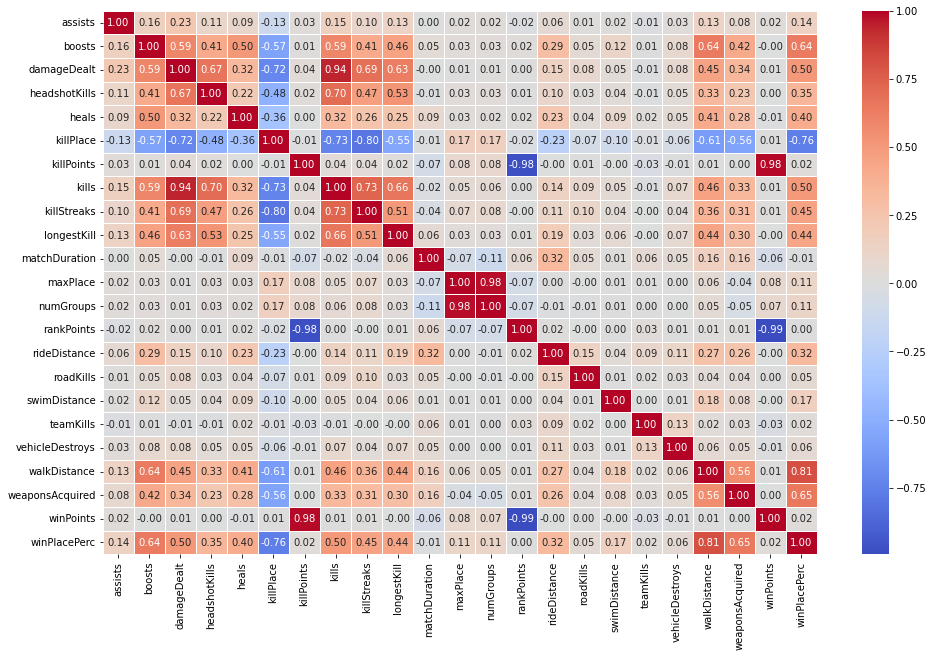

In [14]:
plt.figure(figsize=(16,10))
sns.heatmap(train_solo.corr(), annot=True, linewidths=1, fmt= '.2f',cmap='coolwarm')
plt.show()

# DUO

In [15]:
train_duo = train_copy[(train_copy['matchType'] == 'duo') | (train_copy['matchType'] == 'duo-fpp')]

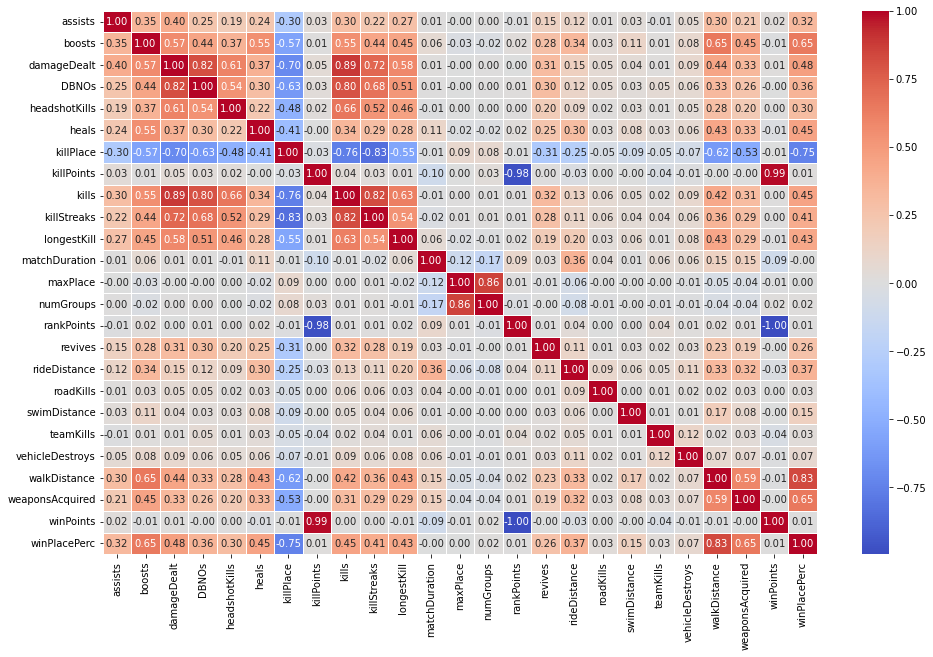

In [16]:
plt.figure(figsize=(16,10))
sns.heatmap(train_duo.corr(), annot=True, linewidths=1, fmt= '.2f',cmap='coolwarm')
plt.show()

# Squad

In [17]:
train_squad = train_copy[(train_copy['matchType'] == 'squad') | (train_copy['matchType'] == 'squad-fpp')]

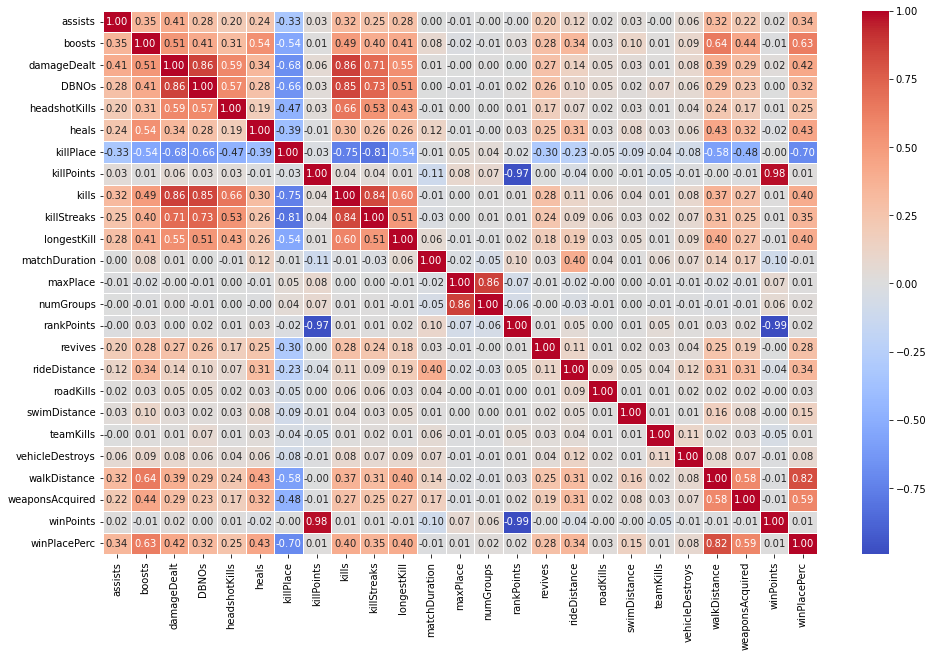

In [18]:
plt.figure(figsize=(16,10))
sns.heatmap(train_squad.corr(), annot=True, linewidths=1, fmt= '.2f',cmap='coolwarm')
plt.show()

# 매치타입 - 이벤트매치 제외

In [19]:
train_match = train_copy.loc[:,'matchType'].value_counts().to_frame()
train_match

,matchType
squad-fpp,1756186
duo-fpp,996691
squad,626526
solo-fpp,536762
duo,313591
solo,181943
normal-squad-fpp,17174
crashfpp,6287
normal-duo-fpp,5489
flaretpp,2505


In [20]:
match_solo = train_match.loc[['solo','solo-fpp'],'matchType'].sum()
match_duo  = train_match.loc[['duo','duo-fpp'],'matchType'].sum()
match_squad  = train_match.loc[['squad','squad-fpp'],'matchType'].sum()

In [52]:
match_type = pd.DataFrame([match_solo,match_duo,match_squad], index = ['solo','duo','squad'], columns=['counts'])
match_type

,counts
solo,718705
duo,1310282
squad,2382712


<AxesSubplot:ylabel='counts'>

<Figure size 720x432 with 0 Axes>

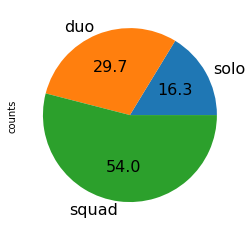

In [22]:
plt.figure(figsize = (10,6))
match_type.plot.pie(y='counts',legend=False,autopct='%.1f',fontsize = 16)

# Columns
boost, walkdistance, weaponAcquired, assists

## boosts

In [23]:
train_copy.loc[:,'boosts'].value_counts().to_frame()

,boosts
0,2521324
1,680252
2,491316
3,295883
4,195729
5,120271
6,70111
7,37626
8,18893
9,8638


Text(0.5, 1.0, 'boosts')

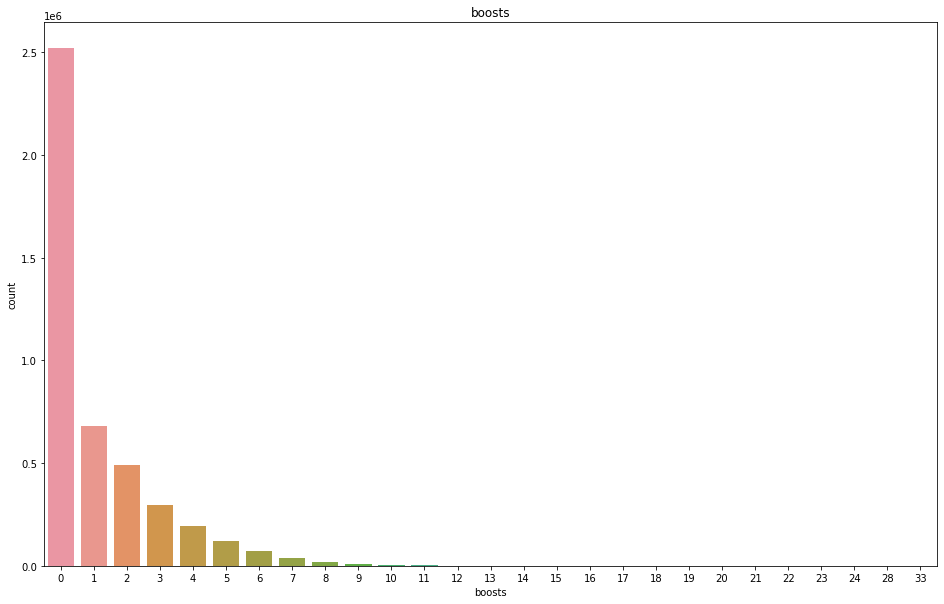

In [24]:
plt.subplots(figsize=(16,10))
sns.countplot(train_copy['boosts']).set_title("boosts")

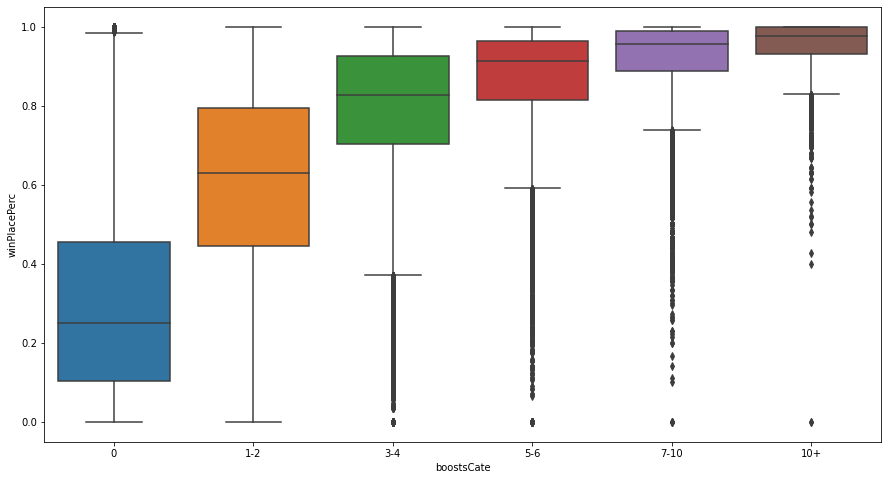

In [91]:
bins=[-1,0,2,4,6,10,80]
labels_boosts=['0','1-2','3-4','5-6','7-10','10+']
train_copy['boostsCate']=pd.cut(train_copy['boosts'],bins, labels = labels_boosts)
plt.figure(figsize=(15,8))
sns.boxplot(x='boostsCate',y='winPlacePerc',data=train_copy)
plt.show()

## walkDistance

In [26]:
train_copy.loc[:,'walkDistance'].value_counts()

0.0000       99603
1007.0000      955
1098.0000      945
1047.0000      939
1036.0000      934
             ...  
0.8005           1
0.3570           1
7935.0000        1
0.8721           1
0.9661           1
Name: walkDistance, Length: 38599, dtype: int64

In [27]:
walkDistance_small = train_copy[train_copy['walkDistance'] < train_copy['walkDistance'].quantile(0.99)]

In [28]:
walkDistance_small['walkDistance'].value_counts().shape # 38599 -> 34506

(34506,)

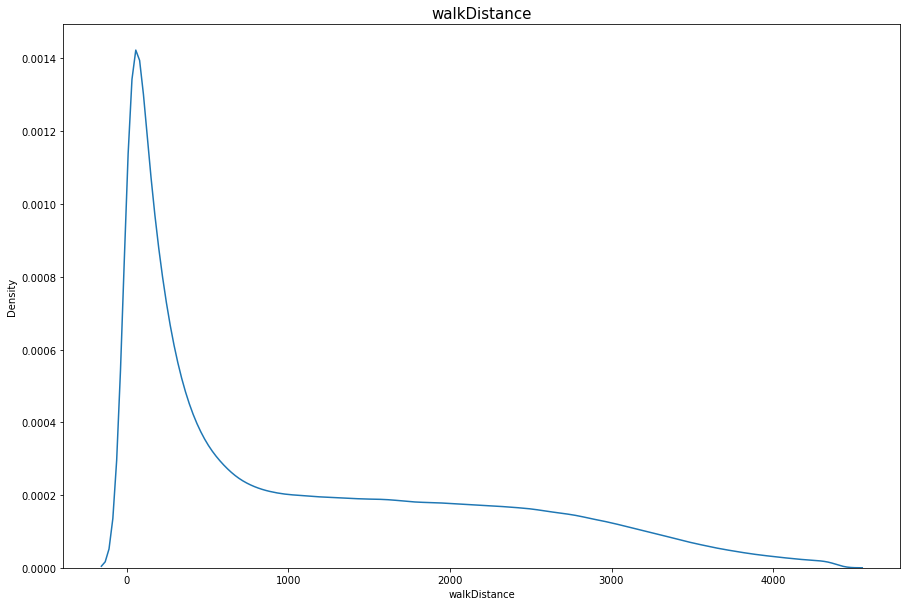

In [29]:
plt.figure(figsize=(15,10))
plt.title('walkDistance',fontsize=15)
sns.distplot(walkDistance_small['walkDistance'],hist=False)
plt.show()

<AxesSubplot:xlabel='walkDistance', ylabel='winPlacePerc'>

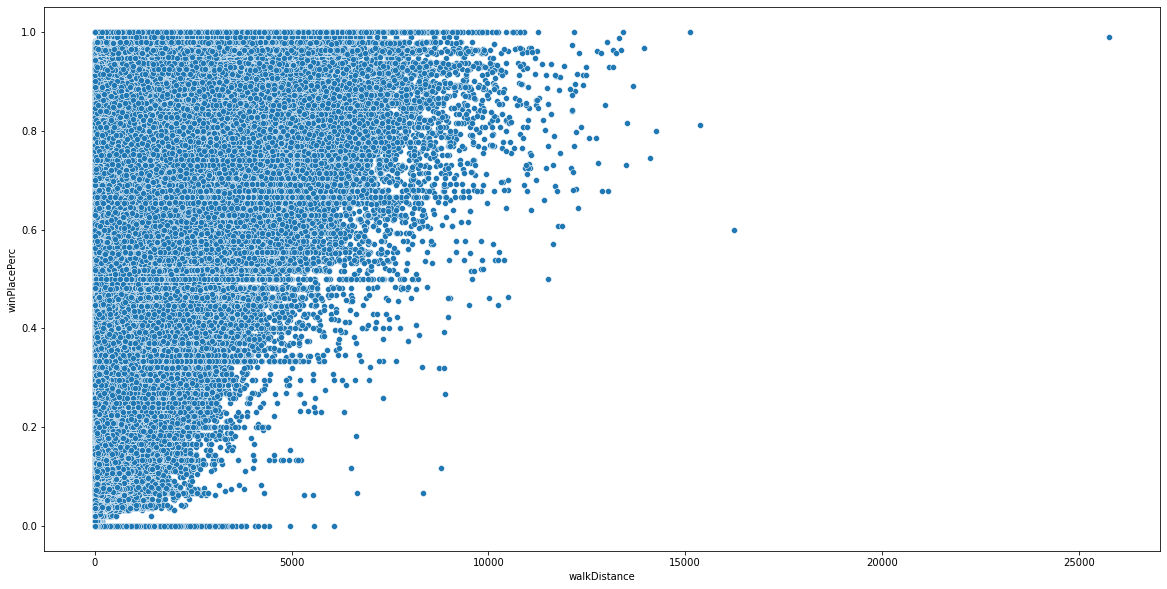

In [30]:
plt.figure(figsize=(20,10))
sns.scatterplot(x="walkDistance", y="winPlacePerc", data=train_copy)

### (walkDistance == 0) & (winPlacePerc == 1)

In [64]:
train_solo[(train_solo['walkDistance'] == 0) & (train_solo['winPlacePerc'] == 1)]

,assists,boosts,damageDealt,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,...,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,weaponCate,assistsCate
3702,0,0,0.0000,0,0,1,0,0,0,0.0,...,0,0.0,0,0,0.0,3,0,1.0,3-4,0
8790,0,0,0.0000,0,0,2,0,0,0,0.0,...,0,0.0,0,0,0.0,1,0,1.0,1-2,0
9264,0,0,0.3218,0,0,1,0,0,0,0.0,...,0,0.0,0,0,0.0,9,0,1.0,9-10,0
18426,0,1,0.0000,0,0,2,0,0,0,0.0,...,0,0.0,0,0,0.0,6,0,1.0,5-6,0
19054,0,0,99.0000,0,0,1,0,0,0,0.0,...,0,0.0,0,0,0.0,9,0,1.0,9-10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4428507,0,0,0.0000,0,0,3,0,0,0,0.0,...,0,0.0,0,0,0.0,18,0,1.0,10-20,0
4430451,0,0,0.0000,0,0,2,0,0,0,0.0,...,0,0.0,0,0,0.0,0,0,1.0,0,0
4432272,0,3,115.6000,0,1,2,0,0,0,0.0,...,0,0.0,0,0,0.0,6,0,1.0,5-6,0
4443248,0,0,0.0000,0,0,2,0,0,0,0.0,...,0,0.0,0,0,0.0,3,0,1.0,3-4,0


In [59]:
train_duo[(train_duo['walkDistance'] == 0) & (train_duo['winPlacePerc'] == 1)]

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,weaponCate,assistsCate


In [60]:
train_squad[(train_squad['walkDistance'] == 0) & (train_squad['winPlacePerc'] == 1)]

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,weaponCate,assistsCate
120666,0,0,0.0,0,0,0,50,1014,0,0,...,0,3.3120,0,0,0.0,0,1502,1.0,0,0
461500,0,0,0.0,0,0,0,40,0,0,0,...,0,0.0000,0,0,0.0,0,0,1.0,0,0
519969,0,0,0.0,0,0,0,39,1050,0,0,...,0,0.0000,0,0,0.0,0,1537,1.0,0,0
1190582,0,0,0.0,0,0,0,44,1213,0,0,...,0,0.0000,0,0,0.0,0,1448,1.0,0,0
1407072,0,0,0.0,0,0,0,35,1237,0,0,...,0,0.0000,0,0,0.0,1,1540,1.0,1-2,0
1415433,0,0,0.0,0,0,0,42,1225,0,0,...,0,0.0000,0,0,0.0,1,1530,1.0,1-2,0
2303213,0,0,0.0,0,0,0,43,1152,0,0,...,0,0.0003,0,0,0.0,0,1491,1.0,0,0
2327852,0,0,0.0,0,0,0,47,0,0,0,...,0,0.0000,0,0,0.0,0,0,1.0,0,0
2478102,0,0,0.0,0,0,0,43,1365,0,0,...,0,0.0916,0,0,0.0,0,1564,1.0,0,0
3112272,0,0,0.0,0,0,0,36,1207,0,0,...,0,4.3600,0,0,0.0,0,1484,1.0,0,0


## weaponsAcquired

In [31]:
train_copy.loc[:,'weaponsAcquired'].value_counts().sort_index()

0      226578
1      580951
2      768836
3      768347
4      689622
        ...  
128         1
153         1
167         1
177         1
236         1
Name: weaponsAcquired, Length: 97, dtype: int64

In [51]:
#print(train_copy['weaponsAcquired'].max())
#print(train_copy[train_copy['weaponsAcquired']>20]['weaponsAcquired'].count())

236
3162


Text(0.5, 1.0, 'boosts')

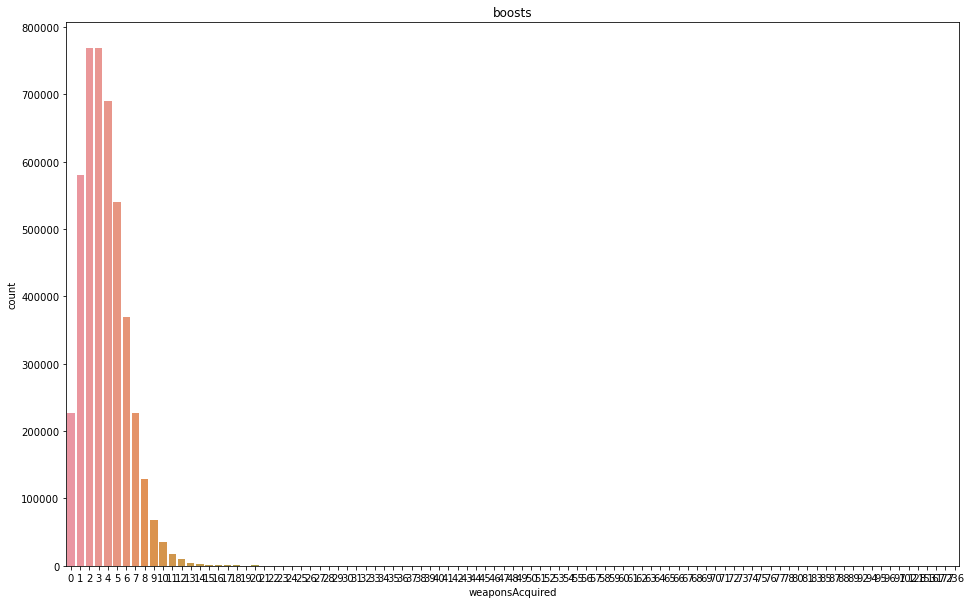

In [33]:
plt.subplots(figsize=(16,10))
sns.countplot(train_copy['weaponsAcquired']).set_title("boosts")

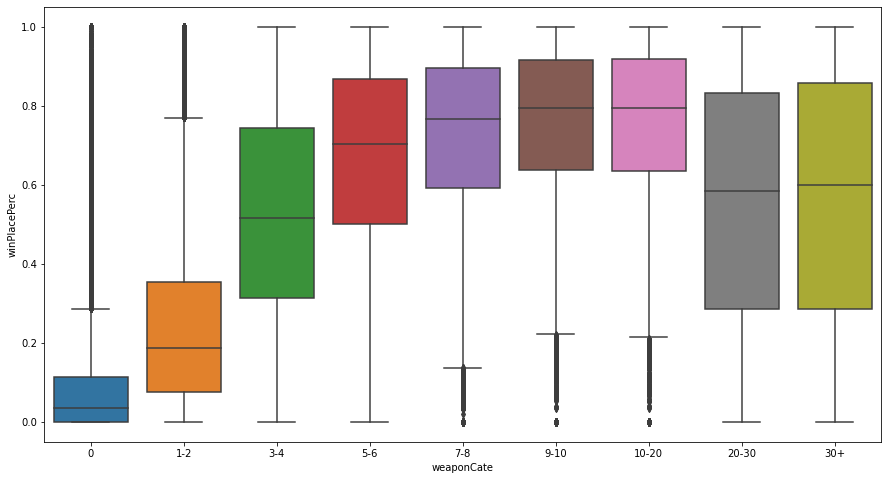

In [75]:
bins=[-1,0,2,4,6,8,10,20,30,250]
labels_weapon=['0','1-2','3-4','5-6','7-8','9-10','10-20','20-30','30+']
train_copy['weaponCate']=pd.cut(train_copy['weaponsAcquired'],bins,labels=labels_weapon)
plt.figure(figsize=(15,8))
sns.boxplot(x='weaponCate',y='winPlacePerc',data=train_copy)
plt.show()

In [35]:
train_zero = train_copy[train_copy['weaponsAcquired'] == 0]

print(train_zero['winPlacePerc'].median())
print(train_zero['winPlacePerc'].quantile(0.75))
train_zero[train_zero['winPlacePerc'] > train_zero['winPlacePerc'].quantile(0.75)].shape

0.0345
0.1146


(56514, 28)

### solo

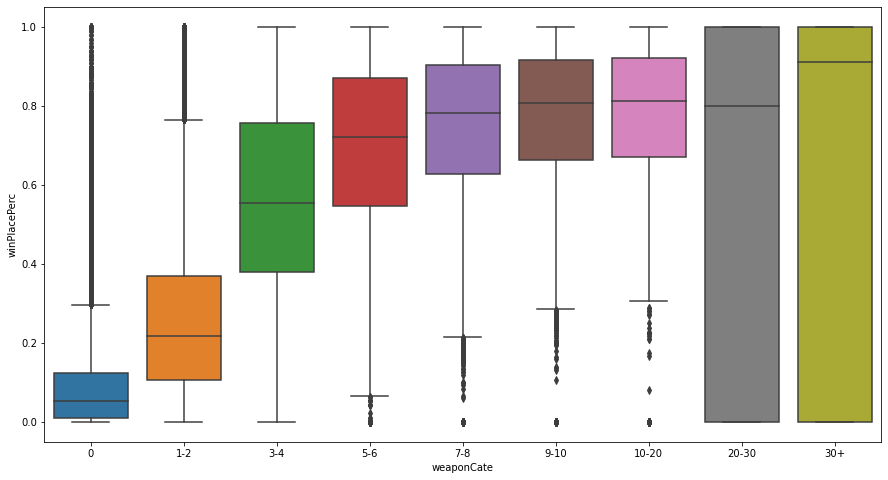

In [79]:
bins=[-1,0,2,4,6,8,10,20,30,250]
train_solo['weaponCate']=pd.cut(train_solo['weaponsAcquired'],bins,labels=labels_weapon)
plt.figure(figsize=(15,8))
sns.boxplot(x='weaponCate',y='winPlacePerc',data=train_solo)
plt.show()

In [37]:
train_solo['weaponsAcquired'].value_counts().sort_index()

0       46546
1      102196
2      120760
3      120240
4      107388
5       84079
6       57764
7       35707
8       20435
9       11115
10       5800
11       3084
12       1581
13        860
14        468
15        247
16        138
17         93
18         63
19         39
20         16
21         22
22          7
23         16
24          7
25          4
26          2
27          4
28          7
30          3
31          4
32          3
33          1
34          1
35          1
41          1
42          1
52          1
153         1
Name: weaponsAcquired, dtype: int64

In [38]:
solo_zero = train_solo[train_solo['weaponsAcquired'] == 0]

print(solo_zero['winPlacePerc'].median())
print(solo_zero['winPlacePerc'].quantile(0.75))
solo_zero[solo_zero['winPlacePerc'] > solo_zero['winPlacePerc'].quantile(0.75)].shape

0.0521
0.125


(11510, 25)

In [61]:
solo_zero[solo_zero['winPlacePerc'] == 1].sort_index()

,assists,boosts,damageDealt,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,...,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,weaponCate
88035,0,0,0.00,0,0,2,0,0,0,0.0,...,0.000,0,0.00,0,0,0.00,0,0,1.0,0
494808,0,0,0.00,0,0,2,0,0,0,0.0,...,0.000,0,0.00,0,0,0.00,0,0,1.0,0
909861,0,0,0.00,0,0,5,0,0,0,0.0,...,0.000,0,0.00,0,0,0.00,0,0,1.0,0
1169042,0,0,0.00,0,0,1,0,0,0,0.0,...,0.000,0,0.00,0,0,0.00,0,0,1.0,0
1282483,0,0,0.00,0,0,1,0,0,0,0.0,...,0.000,0,0.00,0,0,0.00,0,0,1.0,0
1473331,0,0,77.13,0,0,1,0,0,0,0.0,...,0.000,0,0.00,0,0,0.00,0,0,1.0,0
1570573,0,2,0.00,0,1,3,0,0,0,0.0,...,0.000,0,0.00,0,0,0.00,0,0,1.0,0
1670584,0,0,0.00,0,0,2,0,0,0,0.0,...,0.000,0,0.00,0,0,0.00,0,0,1.0,0
1852684,0,0,78.84,0,0,2,0,0,0,0.0,...,0.000,0,0.00,0,0,0.00,0,0,1.0,0
1865098,0,0,0.00,0,0,1,0,0,0,0.0,...,0.000,0,0.00,0,0,0.00,0,0,1.0,0


### duo

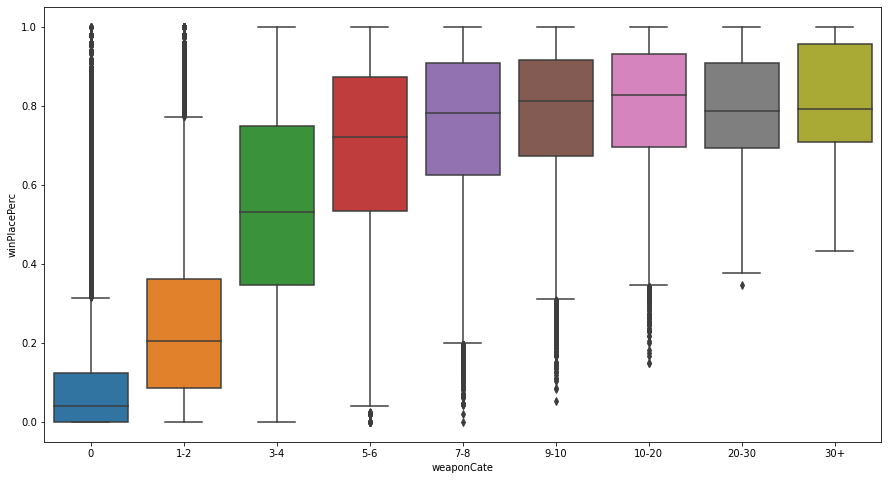

In [80]:
bins=[-1,0,2,4,6,8,10,20,30,250]
train_duo['weaponCate']=pd.cut(train_duo['weaponsAcquired'],bins,labels=labels_weapon)
plt.figure(figsize=(15,8))
sns.boxplot(x='weaponCate',y='winPlacePerc',data=train_duo)
plt.show()

In [40]:
train_duo['weaponsAcquired'].value_counts().sort_index()

0       65082
1      180478
2      226707
3      226547
4      202320
5      158590
6      108066
7       65938
8       37033
9       19564
10       9991
11       5016
12       2480
13       1181
14        613
15        299
16        167
17         61
18         49
19         20
20         19
21         17
22          9
23          3
24          2
25          3
26          4
27          1
28          1
29          1
30          1
31          2
32          1
36          1
39          1
41          1
43          2
45          1
46          1
53          1
63          1
64          1
70          2
74          1
97          1
128         1
167         1
Name: weaponsAcquired, dtype: int64

In [41]:
duo_zero = train_duo[train_duo['weaponsAcquired'] == 0]

print(duo_zero['winPlacePerc'].median())
print(duo_zero['winPlacePerc'].quantile(0.75))
duo_zero[duo_zero['winPlacePerc'] > duo_zero['winPlacePerc'].quantile(0.75)].shape

0.0408
0.125


(15699, 27)

### squad

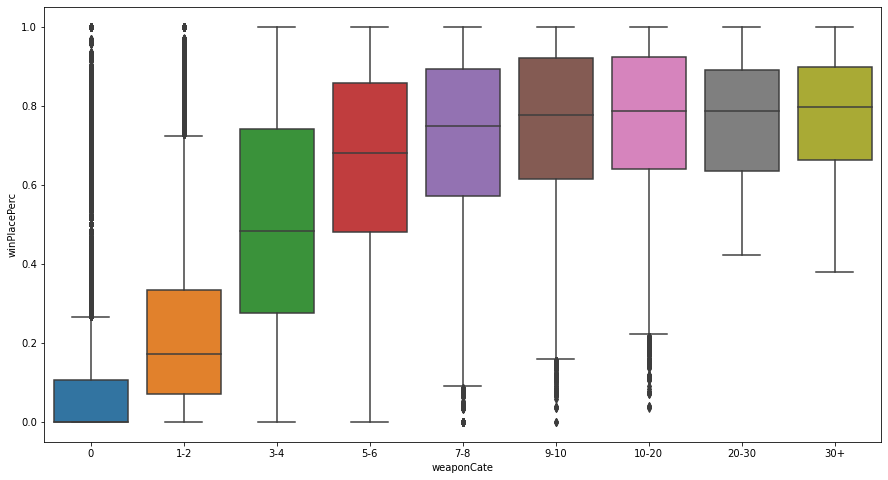

In [82]:
bins=[-1,0,2,4,6,8,10,20,30,250]
train_squad['weaponCate']=pd.cut(train_squad['weaponsAcquired'],bins,labels=labels_weapon)
plt.figure(figsize=(15,8))
sns.boxplot(x='weaponCate',y='winPlacePerc',data=train_squad)
plt.show()

In [43]:
train_squad['weaponsAcquired'].value_counts().sort_index()

0      113325
1      294778
2      417638
3      417611
4      375451
5      294240
6      200688
7      123398
8       69988
9       37155
10      19154
11       9560
12       4822
13       2344
14       1249
15        566
16        296
17        165
18         92
19         60
20         29
21         28
22         11
23          5
24          3
25          7
26          2
27          5
29          4
30          2
31          2
33          1
34          1
35          4
37          3
38          1
39          1
41          3
43          1
47          1
49          2
52          1
56          1
59          1
63          1
67          1
73          1
80          1
81          1
85          1
87          1
95          2
96          1
102         1
177         1
236         1
Name: weaponsAcquired, dtype: int64

In [44]:
squad_zero = train_squad[train_squad['weaponsAcquired'] == 0]

print(squad_zero['winPlacePerc'].median())
print(squad_zero['winPlacePerc'].quantile(0.75))
squad_zero[squad_zero['winPlacePerc'] > squad_zero['winPlacePerc'].quantile(0.75)].shape

0.0
0.1071


(27910, 27)

## assists

- 어시스트는 적에게 최소 25 이상의 피해를 가하고, 그 적이 사망한 경우 얻을 수 있습니다.
1. 플레이어가 최소 피해량을 가한 뒤 60초 이내에 해당 적 플레이어가 기절 후 사망할 경우 어시스트를 얻을 수 있습니다.
2. 위와 같은 상황에서 적 플레이어가 기절하지 않고 즉시 사망하게 되는 경우에도 어시스트가 부여됩니다.

### solo

In [45]:
train_solo['assists'].value_counts()

0    679746
1     37027
2      1782
3       135
4        13
5         2
Name: assists, dtype: int64

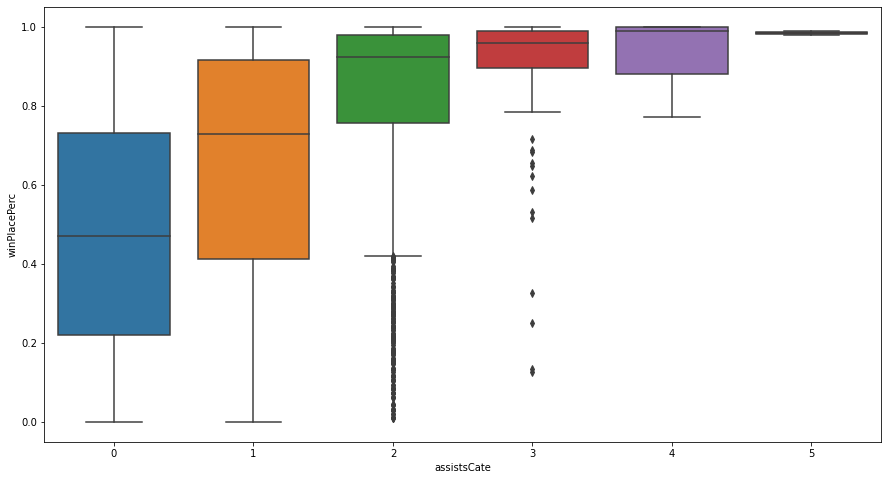

In [46]:
bins=[-1,0,1,2,3,4,5]
train_solo['assistsCate']=pd.cut(train_solo['assists'],bins,labels=['0','1','2','3','4','5'])
plt.figure(figsize=(15,8))
sns.boxplot(x='assistsCate',y='winPlacePerc',data=train_solo)
plt.show()

### duo

In [47]:
train_duo['assists'].value_counts()

0    1088225
1     175452
2      36203
3       8063
4       1796
5        421
6         98
7         18
8          5
9          1
Name: assists, dtype: int64

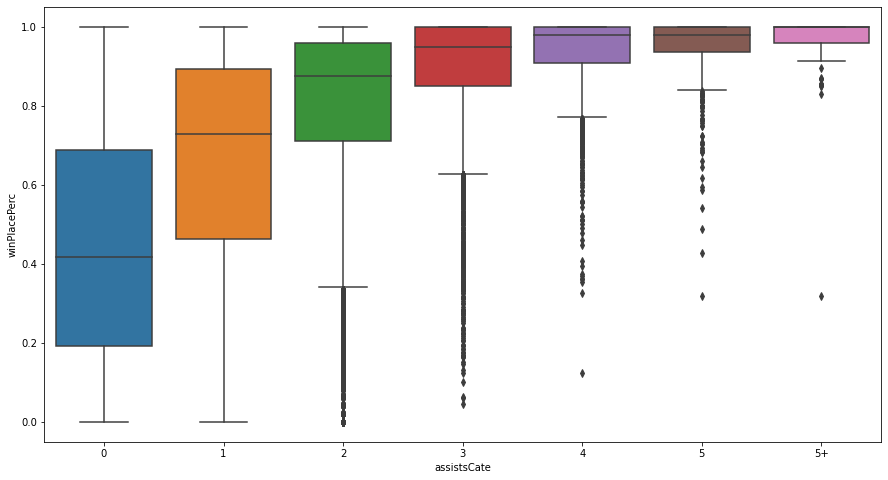

In [48]:
bins=[-1,0,1,2,3,4,5,10]
train_duo['assistsCate']=pd.cut(train_duo['assists'],bins,labels=['0','1','2','3','4','5','5+'])
plt.figure(figsize=(15,8))
sns.boxplot(x='assistsCate',y='winPlacePerc',data=train_duo)
plt.show()

### squad

In [49]:
train_squad['assists'].value_counts()

0     1877686
1      373172
2       96165
3       25858
4        7178
5        1900
6         557
7         140
8          41
9          11
10          3
12          1
Name: assists, dtype: int64

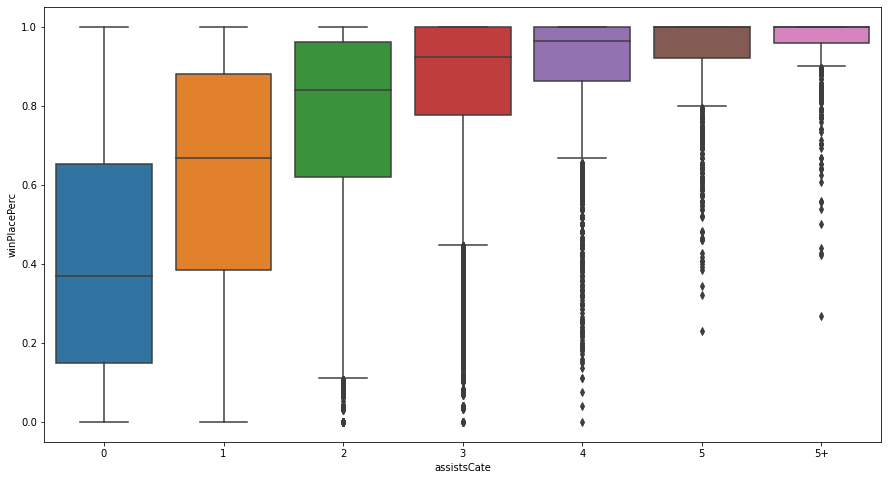

In [50]:
bins=[-1,0,1,2,3,4,5,15]
train_squad['assistsCate']=pd.cut(train_squad['assists'],bins,labels=['0','1','2','3','4','5','5+'])
plt.figure(figsize=(15,8))
sns.boxplot(x='assistsCate',y='winPlacePerc',data=train_squad)
plt.show()

---
# 전처리

walkDistance, killPace, boosts, weaponAcquired
damageDealt, heals, kills, killStreaks, logestKill, rideDistance
위 Columns에 대해 전처리
- 아웃라이어 제거?, 컬럼별 아웃라이어 제거, 제거 시, 데이터 수? 얼마나 데이터가 제거되는지
- 이상한 부분? Ex) 이동거리 0인데 승률이 높은 경우.
- 스케일링?
확인해볼 것 : points (kill, rank, win)


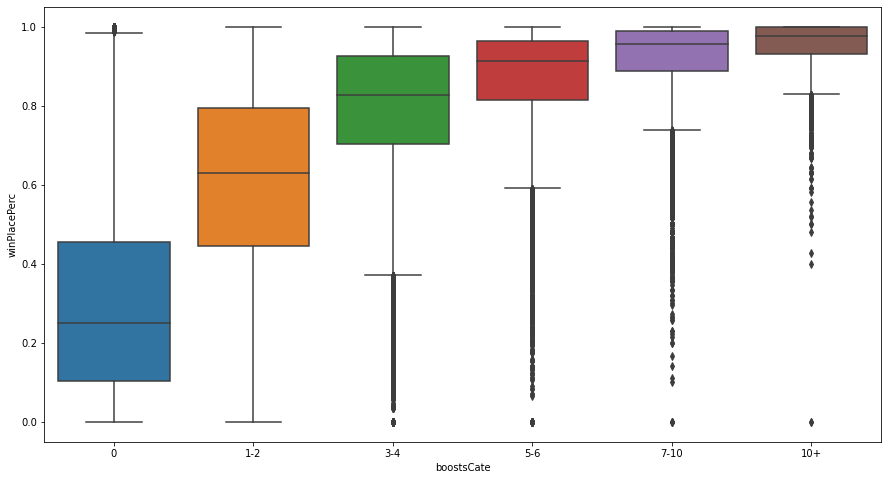

In [211]:
bins=[-1,0,2,4,6,10,80]
train_copy['boostsCate']=pd.cut(train_copy['boosts'],bins,labels=labels_boosts)
plt.figure(figsize=(15,8))
sns.boxplot(x='boostsCate',y='winPlacePerc',data=train_copy)
plt.show()

In [191]:
for i in labels_boosts:
 print('< boosts 사용범위가 '+ f"'{i}'" + ' 인 winPlacePerc >')
 print(train_copy[train_copy['boostsCate'] == i]['winPlacePerc'].describe(),'\n\n')

< boosts 사용범위가 '0' 인 winPlacePerc >
count    2.521323e+06
mean     3.013200e-01
std      2.426814e-01
min      0.000000e+00
25%      1.042000e-01
50%      2.500000e-01
75%      4.565000e-01
max      1.000000e+00
Name: winPlacePerc, dtype: float64 


< boosts 사용범위가 '1-2' 인 winPlacePerc >
count    1.171568e+06
mean     6.118166e-01
std      2.286829e-01
min      0.000000e+00
25%      4.444000e-01
50%      6.296000e-01
75%      7.931000e-01
max      1.000000e+00
Name: winPlacePerc, dtype: float64 


< boosts 사용범위가 '3-4' 인 winPlacePerc >
count    491612.000000
mean          0.798099
std           0.160018
min           0.000000
25%           0.703700
50%           0.827600
75%           0.925900
max           1.000000
Name: winPlacePerc, dtype: float64 


< boosts 사용범위가 '5-6' 인 winPlacePerc >
count    190382.000000
mean          0.877816
std           0.116702
min           0.000000
25%           0.814800
50%           0.913000
75%           0.964300
max           1.000000
Name: winPlacePe

In [216]:
b0 = train_copy[train_copy['boostsCate'] == '0']['winPlacePerc']

upper_b0 = b0.quantile(0.75) + 1.5 * (b0.quantile(0.75)-b0.quantile(0.25))
lower_b0 = b0.quantile(0.25) - 1.5 * (b0.quantile(0.75)-b0.quantile(0.25))

print(upper_b0 ,lower_b0)


0.98495 -0.42424999999999996
